# Phase and the Hilbert Transform

***

## <span style="color:blue">Make Attributes from P-P Reflection Data</span>

Befriko Murdianto, Mar 2025,
Reservoir Geophysics Graduate Program,
University of Indonesia

***

A python version of exercise06a.m in <a href="http:///www.octave.org">Octave</a> that is long overdue.

First, we need to load the data that is stored in <a href="http://www.mathworks.com">MATLAB</a> .mat format.

In [1]:
import scipy.io
import numpy as np

#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
#seis = scipy.io.loadmat('/content/drive/My Drive/data2.mat');

seis = scipy.io.loadmat('C:/Users/befriko.murdianto/OneDrive/Desktop/Documents/UI Lecture/Data/matfiles/data2.mat')
vmin, vmax = np.min(seis["data2"]), np.max(seis["data2"])
vrng = max(abs(vmin), vmax)
cdpmin, cdpmax = seis["cdp"][0,0], seis["cdp"][-1,-1]
print("sample range", seis["ts"][0,0], "to", seis["ts"][-1,-1])
print("trace range", cdpmin, "to", cdpmax)
print("data range", vmin, "to", vmax)
print("data size is", len(seis["data2"]), "rows by", len(seis["data2"][0]), "columns")

sample range 0.4 to 2.8979999999999997
trace range 110 to 675
data range -127 to 127
data size is 1250 rows by 566 columns


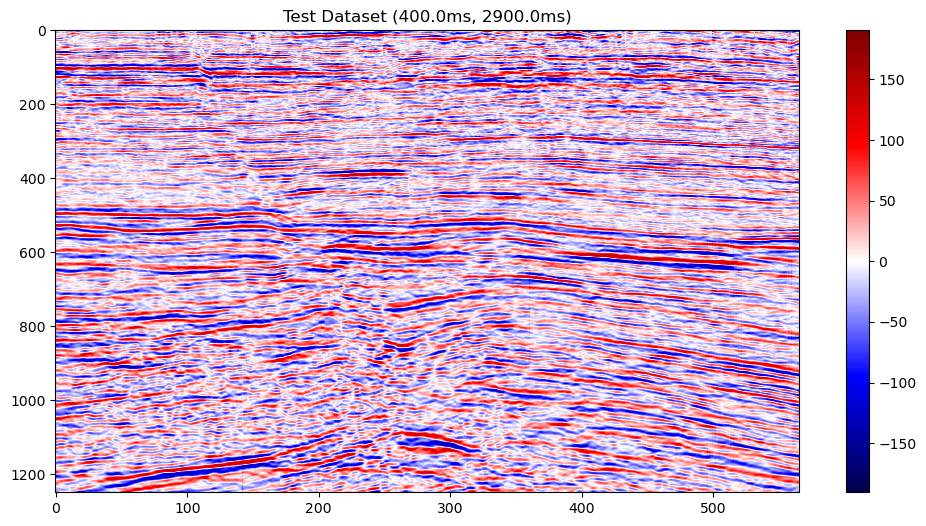

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.imshow(seis["data2"], vmin=-vrng*1.5, vmax=vrng*1.5, cmap='seismic', aspect='auto')
plt.colorbar()
tmin=np.round(seis["ts"][0,0],1); tmax=np.round(seis["ts"][-1,-1],1)
_=plt.title(f"Test Dataset ({tmin*1000}ms, {tmax*1000}ms)")

## <span style="color:blue">Complex Trace Attributes</span>

Figure below illustrates the concept of a complex seismic trace, in which $x(t)$ represents the real seismic trace and $y(t)$ is calculated using Hilbert Transform.
<img src="https://spe.silverchair-cdn.com/spe/content_public/cms/generalinformation/2126/vol5_page_0038_image_0001.png?Expires=2147483647&Signature=0IA9KVniwZioO~LkGvVcEh8LPhew-mGhse3Fkn6DjUSHG7oxEncYwuNDqXkiNEuuFRmo8XP2i9J-h8wSRu-lfNXQpjM~Av8zszV0UUDV05LuZm1x-TRIXs12PppZ5U1QQodgGZgOjSWjH9TvmrxgBSEjVFataQCF9wL1kEQK1YSoGoMDcyhjVFJ7Lr7KPI9l56g25jojeWdG~sYVjYoWRpGjpscls28~17ZeQcnEmmQ7jnVhNmqDiUpEsCZ7qY9TRPas2o3eDo5D7oqr3800PuGsqZs42JNckmdBbxKNN2vy~d2MtBKpxRktAe6ueSTkW8xhmhtoi9dEg9EfSpGiEw__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA" style="width: 400px; height: 300px;"></img>

Computing the Hilbert Transform allows us to use the Analytic Trace Representation

$z = s(t) + i \cdot H(s(t))$

to compute a variety of well known seismic trace attributes. For example, envelope and instantaneous phase.

In [3]:
from scipy.signal import hilbert as hilbert_transform
hilbert = np.zeros_like(seis["data2"])

for x in range(len(seis["data2"])):
    hilbert[x,:] = np.imag(hilbert_transform(seis["data2"][x,:]))

z = seis["data2"] + 1j*hilbert
env = np.abs(z)
phase = np.angle(z)
freq = np.diff(np.unwrap(phase))
envmax = np.max(env)

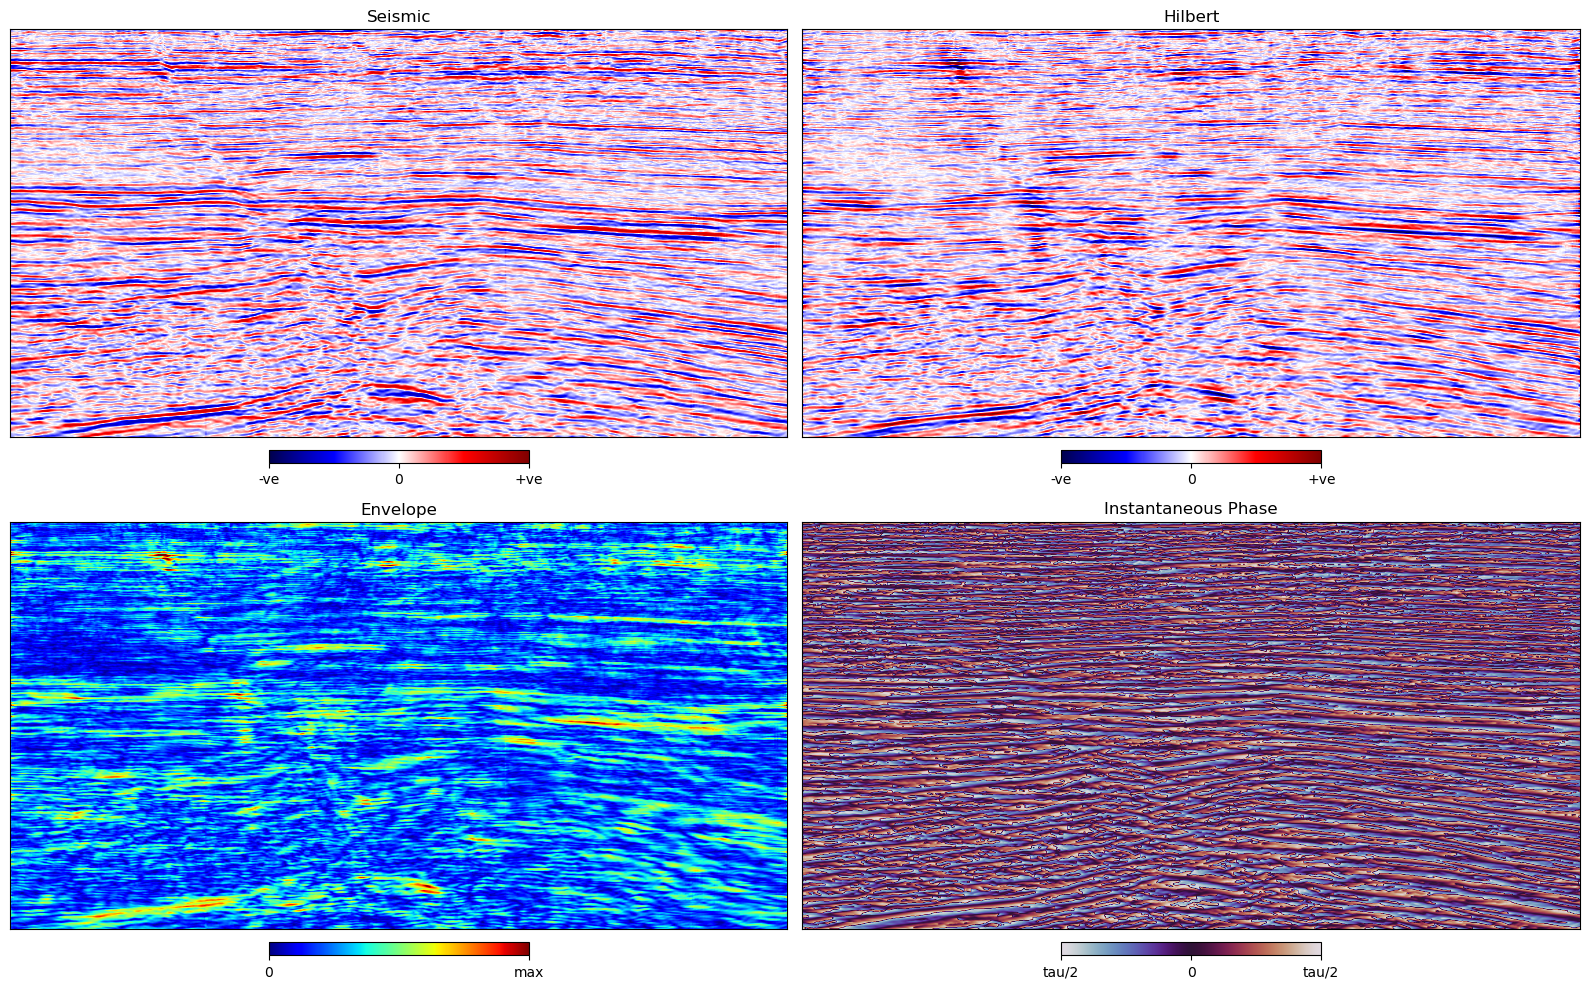

In [4]:
fig, axs = plt.subplots(2,2, figsize=(16,10))

def plot_it(ax, data, vmin, vmax, title, cmap, ticks, ticklabels, alpha=1.0, interpolation='bilinear'):
    im = ax.imshow(data, vmin=vmin, vmax=vmax, cmap=cmap, aspect='auto', alpha=alpha, interpolation=interpolation)
    ax.set_title(title)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    cbar = fig.colorbar(im, 
                        ax=ax,
                        ticks=ticks,
                        orientation='horizontal',
                        fraction=0.03, pad=0.03)
    cbar.ax.set_xticklabels(ticklabels)

plot_it(axs[0][0], seis["data2"], -vrng*1.5, vrng*1.5, 'Seismic', 'seismic', [-vrng*1.5, 0, vrng*1.5], ['-ve', '0', '+ve'])
plot_it(axs[0][1], hilbert, -vrng*1.5, vrng*1.5, 'Hilbert', 'seismic', [-vrng*1.5, 0, vrng*1.5], ['-ve', '0', '+ve'])
plot_it(axs[1][0], env, 0, envmax/1.5, 'Envelope', 'jet', [0, envmax/1.5], ['0', 'max'])
plot_it(axs[1][1], phase, -np.pi, np.pi, 'Instantaneous Phase', 'twilight', [-np.pi, 0, np.pi], ['tau/2', '0', 'tau/2'])

plt.tight_layout()